In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

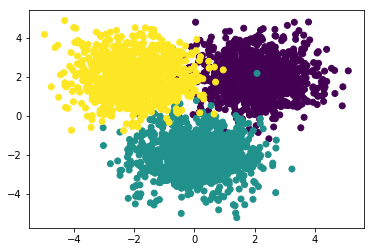

In [2]:
D = 2
K = 3
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y)

In [4]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def feed_forward_train(X,W1,b1,W2,b2,p_keep):
    X_mask = np.random.rand(*X.shape) < p_keep[0]
    Z1 = ReLU(np.matmul(X*X_mask, W1) + b1)
    Z1_mask = np.random.rand(*Z1.shape) < p_keep[1]
    P_hat = softmax(np.matmul(Z1*Z1_mask, W2) + b2)
    return Z1, P_hat

def feed_forward_predict(X,W1,b1,W2,b2,p_keep):
    Z1 = ReLU(np.matmul(p_keep[0]*X, W1) + b1)
    P_hat = softmax(np.matmul(p_keep[1]*Z1, W2) + b2)
    return P_hat

def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [8]:
Y = one_hot_encode(y)

In [16]:
M = 6

W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

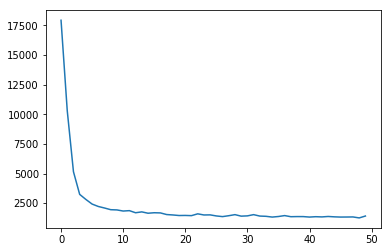

In [17]:
eta = 3e-5
epochs = int(50)
J = np.zeros(epochs)

p_keep = np.array([0.99, 0.9])

for epoch in range(epochs):
    Z1, P_hat = feed_forward_train(X,W1,b1,W2,b2,p_keep)
    J[epoch] = cross_entropy(Y, P_hat)
    
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T, dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2, W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T, dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)
    
plt.figure()
plt.plot(J)

In [18]:
P_hat = feed_forward_predict(X,W1,b1,W2,b2,p_keep)
y_hat = P_hat.argmax(axis = 1)

print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))

Accuracy: 0.9390
